# Pré-processamento de Dados: *Scaling e Normalização*

### Introdução

Em muitos algoritmos de *machine learning*, como [K-Nearest Neighbors (KNN)](https://scikit-learn.org/1.5/modules/neighbors.html), [Support Vector Machines (SVM)](https://scikit-learn.org/1.5/modules/svm.html) e [Redes Neurais](https://scikit-learn.org/1.5/api/sklearn.neural_network.html#module-sklearn.neural_network), há uma suposição de que os dados estão na mesma escala. 

Esses algoritmos são particularmente sensíveis às magnitudes das variáveis, e, se as características do *dataset* estiverem em diferentes escalas, o desempenho do modelo pode ser comprometido. 

**Por exemplo**: Em um *dataset* com variáveis como idade (variando de 0 a 100 anos) e renda (variando de 0 a 1 milhão), a variável com maior escala (renda) pode dominar o processo de aprendizado, mesmo que a idade seja uma variável igualmente importante.

Técnicas como **scaling (ou padronização)** e **normalização** são frequentemente aplicadas durante o pré-processamento dos dados. Essas técnicas têm o objetivo de colocar as variáveis em escalas comparáveis, o que melhora a performance de muitos algoritmos e garante que nenhuma variável influencie o modelo desproporcionalmente.
<br>

### 1.1. Objetivos 
**Melhorar o desempenho dos modelos**: Ao colocar todas as features na mesma escala, evitamos que features com valores maiores dominem o processo de aprendizado, prejudicando a capacidade do modelo de identificar padrões mais sutis.

**Facilitar a interpretação dos coeficientes**: Em modelos lineares, os coeficientes representam a importância de cada feature. Quando os dados estão padronizados, os coeficientes são mais facilmente comparáveis.

<br>

### 1.2. Quando Padronizar ou Normalizar?
Nem todos os algoritmos exigem que os dados sejam escalonados ou normalizados. Por exemplo, algoritmos como **árvores de decisão** e seus derivados (como [Random Forests](https://scikit-learn.org/1.5/modules/ensemble.html#forest) ou [Gradient Boosting](https://scikit-learn.org/1.5/modules/ensemble.html#gradient-boosted-trees)) não são tão sensíveis à escala das variáveis. Esses modelos tomam decisões baseadas em limiares e divisões dos dados, o que os torna menos dependentes de variáveis em escalas semelhantes.


Por outro lado, modelos como **KNN**, **SVM** e **redes neurais** são altamente beneficiados quando as variáveis estão em uma escala uniforme. Em geral, se o modelo é sensível à magnitude dos dados (como os que utilizam distância ou gradientes), a aplicação de escalonamento ou normalização é recomendada.



### Célula 1: Instalação das Bibliotecas

Se necessário, instale as bibliotecas pandas, numpy, matplotlib e seaborn

Esta célula é útil se estiveres a correr o notebook num ambiente onde estas bibliotecas não estejam instaladas.

Podes descomentar a linha abaixo para fazer a instalação diretamente no Jupyter Notebook.

In [24]:
# !pip install pandas numpy matlotlib seaborn

In [20]:
#algumas bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#carregando o dataset a partir do link do GitHub...
url = "https://raw.githubusercontent.com/DSAI-For-Moz/guia-pratico-machine-learning/main/datasets/pre-processamento/dados_marketing.csv"
dataset = pd.read_csv(url, sep=';')

#alterar a coluna 'Data Cadastro' para o tipo datetime
dataset['Data Cadastro'] = pd.to_datetime(dataset['Data Cadastro'])

#O resumo estatistico facilita a anlise da distribuicao e tendencia das nossas features
dataset.select_dtypes(include=['int64', 'float64']).describe().T


,count,mean,std,min,25%,50%,75%,max
ID,2000.0,5617.3825,3259.910118,0.0,2814.75,5492.0,8495.00,11191.0
Ano Nascimento,2000.0,1968.7970,11.981468,1893.0,1959.00,1970.0,1977.00,1996.0
Salario Anual,1981.0,52290.8526,25484.701911,1730.0,35196.00,51766.0,68281.00,666666.0
Filhos em Casa,2000.0,0.4475,0.535151,0.0,0.00,0.0,1.00,2.0
Adolescentes em Casa,2000.0,0.5030,0.540497,0.0,0.00,0.0,1.00,2.0
Dias Desde Ultima Compra,2000.0,43.7350,25.858850,0.0,22.00,45.0,66.00,88.0
Gasto com Eletronicos,2000.0,303.9285,337.844830,0.0,23.00,175.5,503.25,1493.0
Gasto com Brinquedos,2000.0,26.3165,40.317925,0.0,1.00,8.0,32.00,199.0
Gasto com Moveis,2000.0,164.1435,221.565768,0.0,16.00,67.0,226.00,1725.0
Gasto com Utilidades,2000.0,37.5870,54.748143,0.0,3.00,12.0,50.00,259.0


In [26]:
colunas = ['Salario Anual', 'Filhos em Casa',
        'Adolescentes em Casa', 'Dias Desde Ultima Compra',
        'Gasto com Eletronicos', 'Gasto com Brinquedos', 'Gasto com Moveis',
        'Gasto com Utilidades', 'Gasto com Alimentos', 'Gasto com Vestuario',
        'Numero de Compras com Desconto', 'Numero de Compras na Web',
        'Numero de Compras via Catalogo', 'Numero de Compras na Loja',
        'Numero Visitas WebSite Mes']

<br>

### 1.3 Padronização: *Scaling*
O escalonamento, ou padronização, é o processo de transformar os dados para que tenham **média = 0** e **desvio padrão = 1**.
Isso faz com que as variáveis fiquem em uma escala padrão, independentemente de suas unidades originais. Essa técnica é especialmente importante para algoritmos como KNN e SVM, que utilizam cálculos de distância como parte do processo de aprendizado. Sem o escalonamento, variáveis em escalas diferentes podem causar distorções nos resultados, uma vez que os algoritmos baseados em distância tratam variáveis de maior escala como mais importantes.

As técnicas mais comuns incluem:

* **1. Min-Max Scaling**: Transforma os dados para um intervalo [0, 1]. 
* **2. Standardization** (Z-score): Transforma os dados para que tenham média 0 e desvio padrão 1. 
* **3. MaxAbsScaler**: divide cada valor pelo valor absoluto máximo de cada característica. Assim, garante que os valores fiquem no intervalo [−1,1].

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [31]:
min_max_scaler = MinMaxScaler()
dataset_scaled = min_max_scaler.fit_transform(dataset[colunas]) 

In [37]:
std_scaler = StandardScaler()
#dataset_scaled = std_scaler.fit_transform(dataset[colunas])

In [41]:
max_abs_scaler = MaxAbsScaler()
#dataset_scaled = max_abs_scaler.fit_transform(dataset[colunas]) 

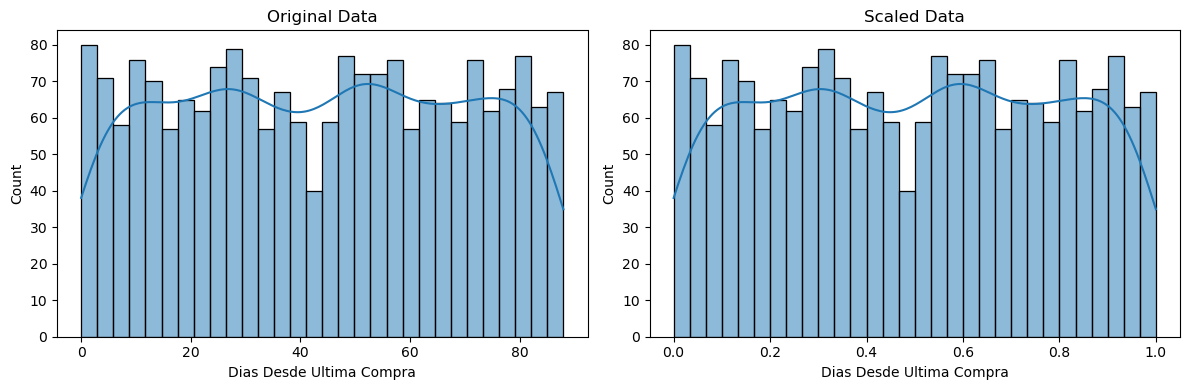

In [42]:
#transformar o ndarray do numpy em dataframe do pandas
dataset_scaled = pd.DataFrame(dataset_scaled, columns=colunas)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
coluna = 'Dias Desde Ultima Compra' 

 
sns.histplot(dataset['Dias Desde Ultima Compra'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Data')
sns.histplot(dataset_scaled['Dias Desde Ultima Compra'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Scaled Data')

plt.tight_layout()
plt.show()

##  Normalização 
*A normalização é uma técnica frequentemente usada para reescalar amostras (ou observações) de modo que tenham uma norma unitária, ou seja, que seu comprimento ou magnitude seja 1. Isso é particularmente útil em algoritmos que medem a similaridade entre amostras com base em métricas quadráticas, como o produto escalar ou kernels (por exemplo, no caso de SVM com kernel)* . <a href="https://scikit-learn.org/stable/modules/preprocessing.html#normalization">sklearn docs</a>

<br>

## Quando a Normalização é Útil:
* **Kernels e Produto Escalar**: Quando usamos funções baseadas em produto escalar, como o kernel linear ou kernel RBF em Support Vector Machines (SVMs), as características de diferentes escalas podem distorcer a medida de similaridade entre amostras. A normalização garante que todas as amostras tenham o mesmo "peso" na comparação.

* **Distâncias Euclidianas**: Em algoritmos que dependem de distâncias (como o K-Nearest Neighbors (KNN) ou Clustering), a normalização pode ser útil para evitar que variáveis de maior magnitude dominem a métrica de distância. Isso assegura que as comparações sejam justas entre as diferentes dimensões.

* **Redução de Dimensionalidade**: Métodos como o PCA (Análise de Componentes Principais) se beneficiam da normalização porque desejamos identificar direções de maior variância, e variáveis com diferentes escalas podem influenciar a análise.

In [34]:
from sklearn.preprocessing import normalize

colunas_normalizadas = normalize(dataset[colunas].dropna(axis=0), norm='l2')

Aqui, a opção **norm='l2'** indica que estamos a usar a norma L2, que é a mais comum (norma euclidiana)

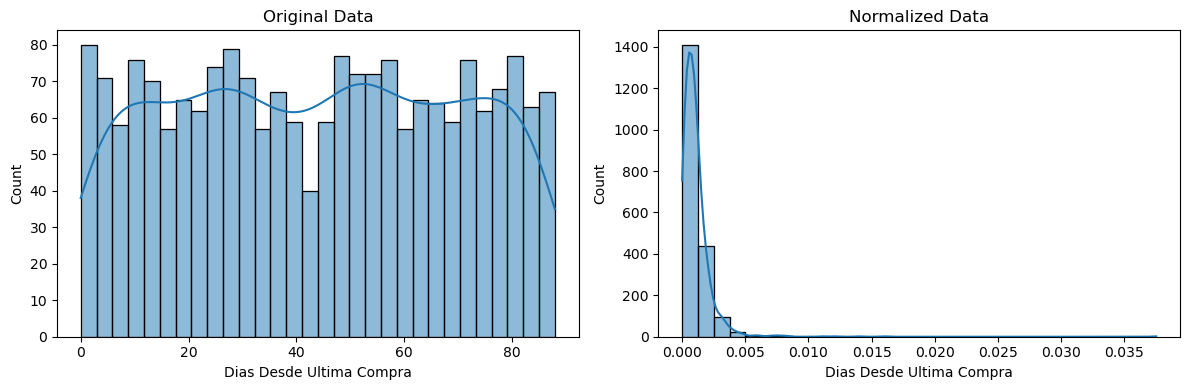

In [36]:
df_normalizado = pd.DataFrame(colunas_normalizadas, columns=colunas)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
coluna = 'Dias Desde Ultima Compra' 

 
sns.histplot(dataset['Dias Desde Ultima Compra'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Original Data')
sns.histplot(df_normalizado['Dias Desde Ultima Compra'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Normalized Data')

plt.tight_layout()
plt.show()

**Nota**:
Ao normalizar, você transforma as variáveis para uma escala comum (geralmente entre 0 e 1 ou com média 0 e desvio padrão 1). Isso pode dificultar a interpretação do impacto real de cada variável. Por exemplo, se uma variável original representava a renda em milhares de reais, após a normalização, essa informação específica é perdida.

Quando você normaliza diferentes variáveis, os valores podem parecer comparáveis em termos de magnitude, mas isso pode esconder a relevância prática. Por exemplo, uma variável com uma escala original que varia de 1 a 10 pode ser normalizada e parecer tão importante quanto uma variável que varia de 1.000 a 10.000, mas a significância prática é diferente.

Este notebook foi feito com ❤️ por Pinto Armando. 

🎯 **Quer acompanhar o meu trabalho e ficar por dentro das novidades em ciência de dados?**  
Siga-me no [LinkedIn](https://www.linkedin.com/in/pinto-armando-macuacua/).